# CPSC5070_01 assignment 5

## Part 1: Visualize Daily Treasury Yield Curve Rates

### (10pts) 1. You are provided with a Daily Treasury Yield Curve Rates as rates.csv file. Load into dataframe. Use Date as index.

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
rates = pd.read_csv("rates.csv")



In [14]:
rates

,Date,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,1/2/19,2.40,2.40,2.42,2.51,2.60,2.50,2.47,2.49,2.56,2.66,2.83,2.97
1,1/3/19,2.42,2.42,2.41,2.47,2.50,2.39,2.35,2.37,2.44,2.56,2.75,2.92
2,1/4/19,2.40,2.42,2.42,2.51,2.57,2.50,2.47,2.49,2.56,2.67,2.83,2.98
3,1/7/19,2.42,2.42,2.45,2.54,2.58,2.53,2.51,2.53,2.60,2.70,2.86,2.99
4,1/8/19,2.40,2.42,2.46,2.54,2.60,2.58,2.57,2.58,2.63,2.73,2.88,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,12/24/19,1.55,1.58,1.58,1.61,1.53,1.62,1.64,1.72,1.83,1.90,2.20,2.33
246,12/26/19,1.59,1.60,1.58,1.61,1.53,1.64,1.65,1.72,1.85,1.90,2.19,2.33
247,12/27/19,1.56,1.56,1.57,1.59,1.51,1.59,1.60,1.68,1.80,1.88,2.18,2.32
248,12/30/19,1.51,1.53,1.57,1.60,1.57,1.58,1.59,1.68,1.81,1.90,2.21,2.34


### (10pts) 2. Plot curves on all columns in one graph, with x axis the count of date, y axis the rates. By visually inspecting the curves, which curve has the overall highest rate through out the year? Highlight that curve with red solid line, every other curves in dash line.

Curve with highest overall rate: 30 Yr


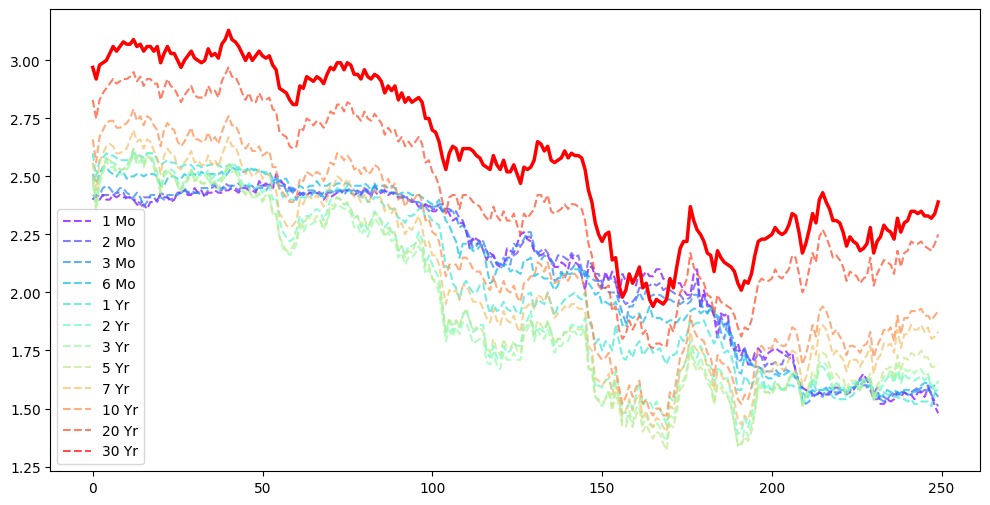

In [15]:
# your ode here:

rates_columns = rates.columns.drop('Date')

average_rates = rates[rates_columns].mean()
highest_curve = average_rates.idxmax()
print("Curve with highest overall rate:", highest_curve)

# Plot all columns
ax = rates[rates_columns].plot(figsize=(12,6), linestyle='--', cmap = 'rainbow',alpha=0.7
)

rates[highest_curve].plot(ax=ax, color='red', linewidth=2.5, label=f"{highest_curve} (Highest)"
)

plt.show()


The 30 year Treasury yield consistently has the highest average rate, reflecting the long term interest rate premium. Short term yields (1 Mo 1 Yr) start lower than long term yields, showing a normal upward-sloping curve, though some flattening occurs in the middle period. All yields decline overall, with the 30 year rate showing the largest absolute change, while short term rates remain relatively stable initially. The plot illustrates general yield compression, minor curve flattening, and the sensitivity of long term rates to market conditions.

### (10pts)3. PairGrid all short rates (less than one year rate). You should get a 4x4 graph. Use histplot for diagonal plots, use scatter plot for upper corner, and regplot for lower corner.

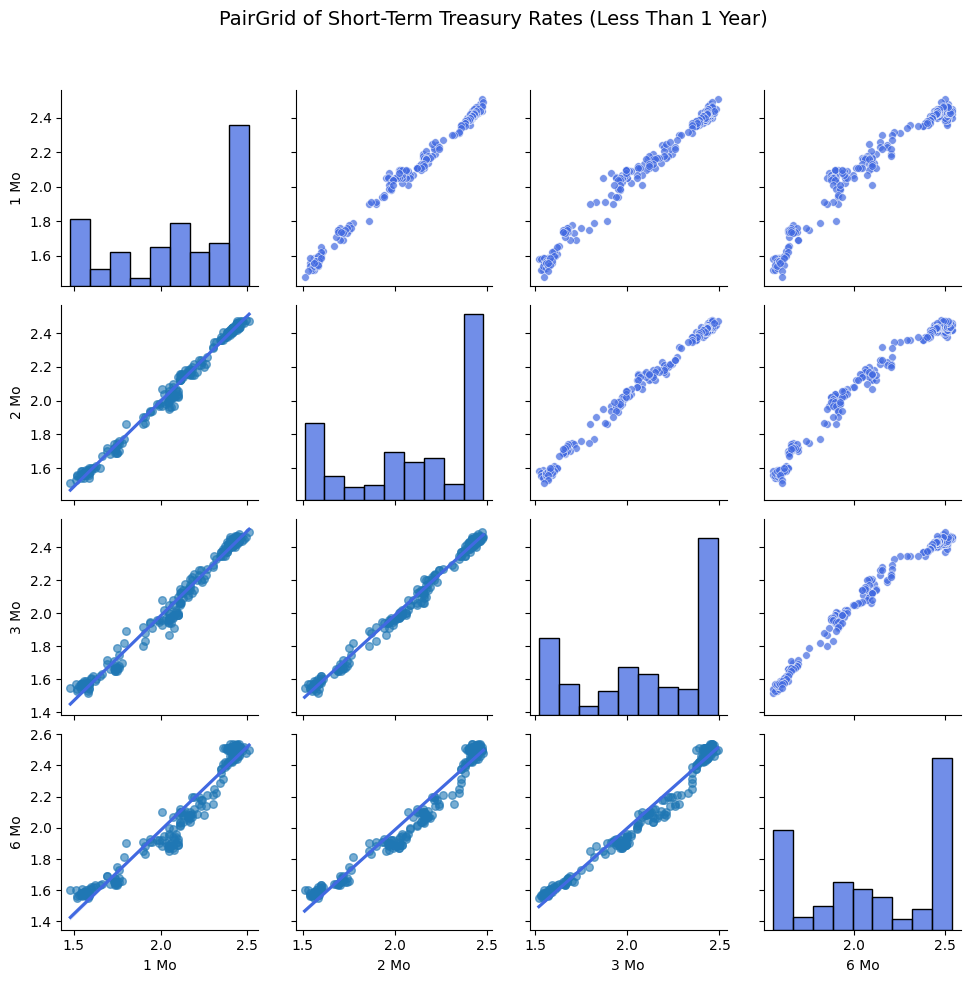

In [16]:
# your code here:


short_rates = ['1 Mo', '2 Mo', '3 Mo', '6 Mo']
df_short = rates[short_rates]

g = sns.PairGrid(df_short)

g.map_upper(sns.scatterplot, color='royalblue', s=30, alpha=0.7)
g.map_lower(sns.regplot, scatter_kws={'s':30, 'alpha':0.6}, line_kws={'color':'royalblue'})
g.map_diag(sns.histplot, color='royalblue')

# Add title
plt.subplots_adjust(top=0.9)
g.fig.suptitle("PairGrid of Short-Term Treasury Rates (Less Than 1 Year)", fontsize=14)

plt.show()


The short-term rates (1 Mo, 2 Mo, 3 Mo, 6 Mo) are highly correlated, moving almost proportionally with one another. Histograms show bimodal distributions, reflecting periods of lower and higher rates. Scatter plots of adjacent maturities cluster tightly along a line, indicating near 1:1 relationships. Overall, the PairGrid highlights the strong interdependence of short-term Treasury yields and distinct rate regimes over the observed period.

### (10pts)4. "reg" jointplot 2m and 3m rates.

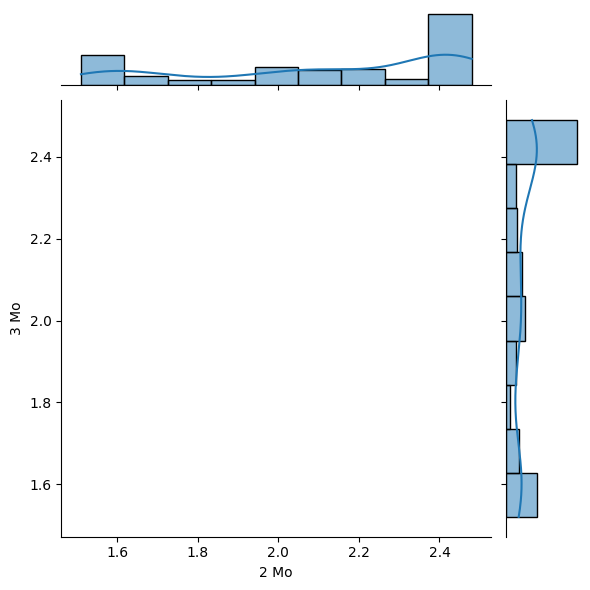

In [ ]:
# your code here

g = sns.JointGrid(x = '2 Mo', y = '3 Mo', data = df_short)
g.plot_marginals(sns.histplot, kde = True)
g.plot(sns.regplot, sns.histplot)


The 2 Month and 3 Month Treasury yields are nearly perfectly correlated, forming a tight straight line with a positive slope. This indicates that as the 2 Mo yield rises, the 3 Mo yield increases by a predictable, nearly constant amount, with minimal term premium. Both yields show bimodal marginal distributions, reflecting two distinct rate periods: one lower (~1.5 - 1.8%) and one higher (~2.2 - 2.5%). Overall, the plot highlights the strong co-movement of adjacent short term rates and the presence of distinct market regimes during the observed period.

### (10pts)5. Use heatmap to show the correlations between each column.

<AxesSubplot:>

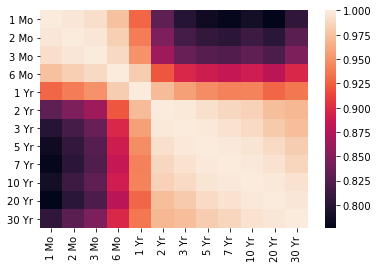

In [ ]:
# your code here:
rates_data = rates.drop(columns='Date')

corr = rates_data.corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr,)

plt.title("Correlation Heatmap of Treasury Yield Curves")
plt.show()

Short term yields (1 Mo 6 Mo) are nearly perfectly correlated, reflecting their sensitivity to Federal Reserve policy. Most yields across the curve move together, showing that macroeconomic events generally shift the entire yield curve. Correlation between short term and long-term yields (20 Yr 30 Yr) is slightly lower, indicating long term rates respond more to inflation and growth expectations. The diagonal confirms that each yield correlates perfectly with itself.

## part 2: Titanic

You can load the titanic data in seaborn
`titanic = sns.load_dataset('titanic')`

### (10pts)select only the four columns: ['survived','sex', 'age', 'class']

In [68]:
# your code here:
titanic = sns.load_dataset('titanic')

titanic = titanic[['survived', 'sex', 'age','class']]

In [69]:
titanic

,survived,sex,age,class
0,0,male,22.0,Third
1,1,female,38.0,First
2,1,female,26.0,Third
3,1,female,35.0,First
4,0,male,35.0,Third
...,...,...,...,...
886,0,male,27.0,Second
887,1,female,19.0,First
888,0,female,NaN,Third
889,1,male,26.0,First


### (10pts) Use countplot to show the survived count of male and female:

<Axes: xlabel='sex', ylabel='count'>

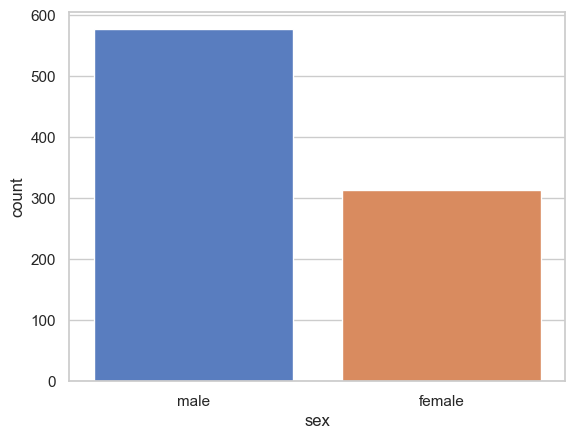

In [ ]:
# your code here:

sns.countplot(x='sex', hue = 'sex', data = titanic)

The plot shows that male passengers outnumber female passengers on the Titanic. The male count is close to 600, while the female count is around 300, indicating nearly twice as many men as women onboard.

### (10pts)Display the age distribution between survived and not survived in violinplot

<Axes: xlabel='sex', ylabel='age'>

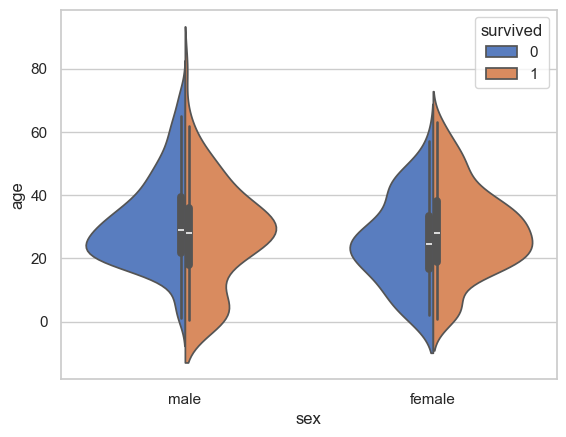

In [ ]:
# your code here:
sns.violinplot(x='sex', y='age', hue='survived', data=titanic, split=True)

The violin plot shows that females had much higher survival rates than males, with survivors concentrated between ages 18–40, while most male fatalities occurred in their 20s–30s. Children, especially boys under 10, had higher survival, reflecting the "women and children first" policy. Overall, sex was a stronger predictor of survival than age.

### (10pts) compare the age distribution for each class and split by survival status.

<Axes: xlabel='class', ylabel='age'>

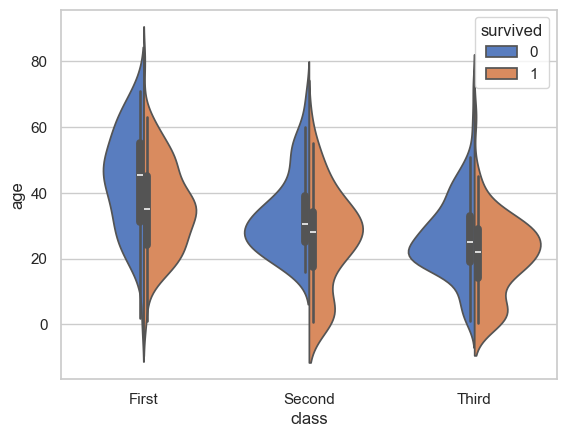

In [ ]:
# your code here:

sns.violinplot(x='class', y='age', hue='survived', data=titanic, split=True)

The violin plot shows that First Class passengers had the highest survival rates, while Third Class had the lowest, with most non-survivors being young adults. Survival in Third Class was higher among children under 10, reflecting the "children first" rule. Overall, social class strongly influenced survival, with age playing a secondary role.

### (10pts)inspect the age distribution between male and female using boxplot.

<Axes: xlabel='sex', ylabel='age'>

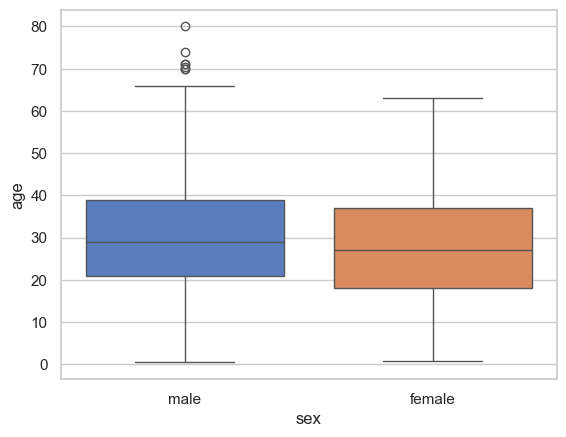

In [ ]:
# your code here:
sns.boxplot(x='sex', y='age', data=titanic, hue ='sex')

The box plot shows that male passengers were slightly older on average (median ~30) compared to females (median ~27), with a slightly wider age spread. Both sexes had most passengers between their late teens and late 30s, but males included several outliers above 80, while the oldest female was around 63–64. Overall, the oldest passengers on the Titanic were male.